#  Sumarização

#### Imports e carga dos dados

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Dataset

Dataset do livro "Handbook of the Business Growth" com dados de e-commerce.

[Fonte](https://github.com/mriffaud/Handbook-for-Business-Growth)

In [ ]:
# Read CSV
df = pd.read_csv('https://docs.google.com/uc?export=download&id=1_zL5CtZjV2l3WdxCXNx8obLbeePV0gVP', encoding='unicode_escape')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

#### Revenue (Receita)


In [ ]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month).astype(str)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012


In [ ]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


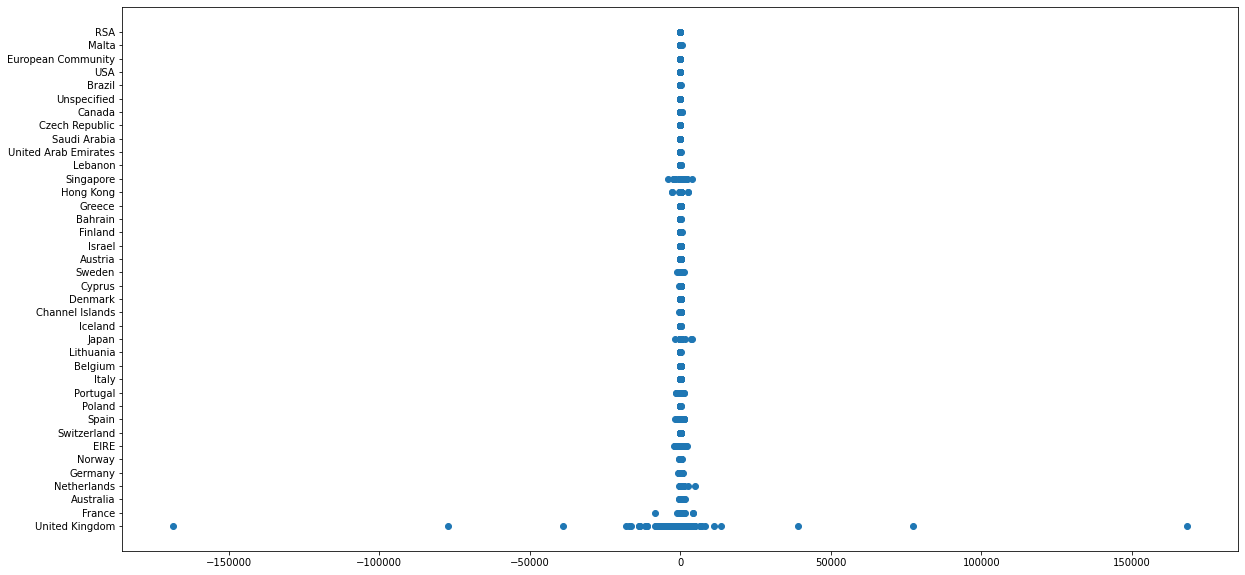

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=df.Revenue, y=df.Country)
plt.show()

Removendo UK para termos um gráfico melhor de analisar (apenas para fins didáticos!)

In [ ]:
df.drop(df[df.Country == 'United Kingdom'].index, inplace=True)

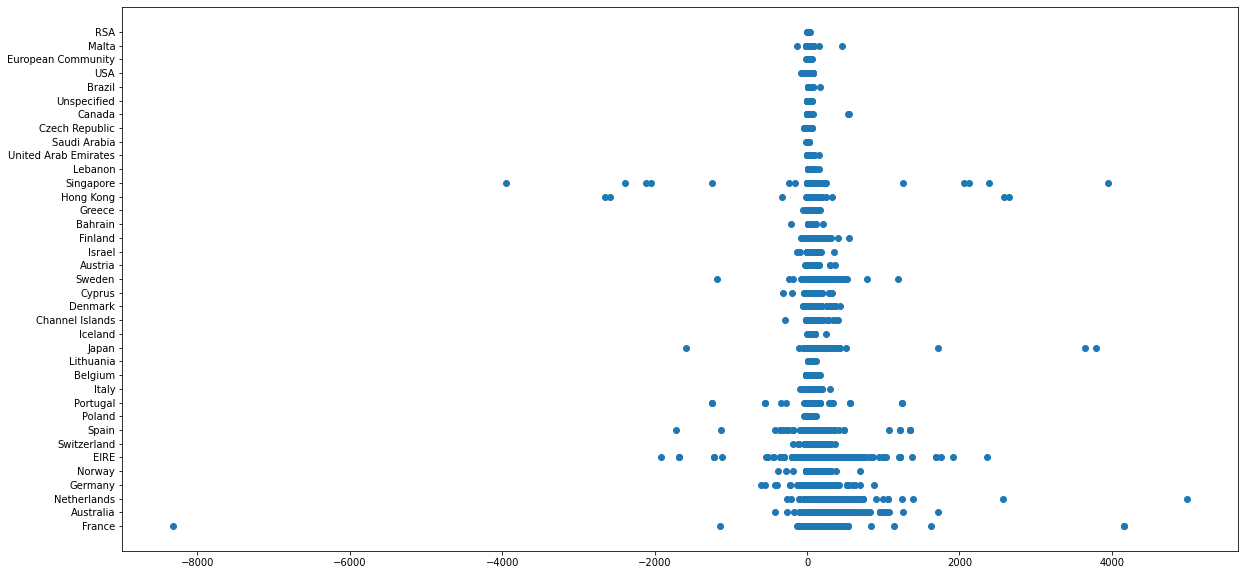

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=df.Revenue, y=df.Country)
plt.show()

#### Analisando por mês ao invés de país. Adicionei um pouco de transparência aos pontos para facilitar a visualização.

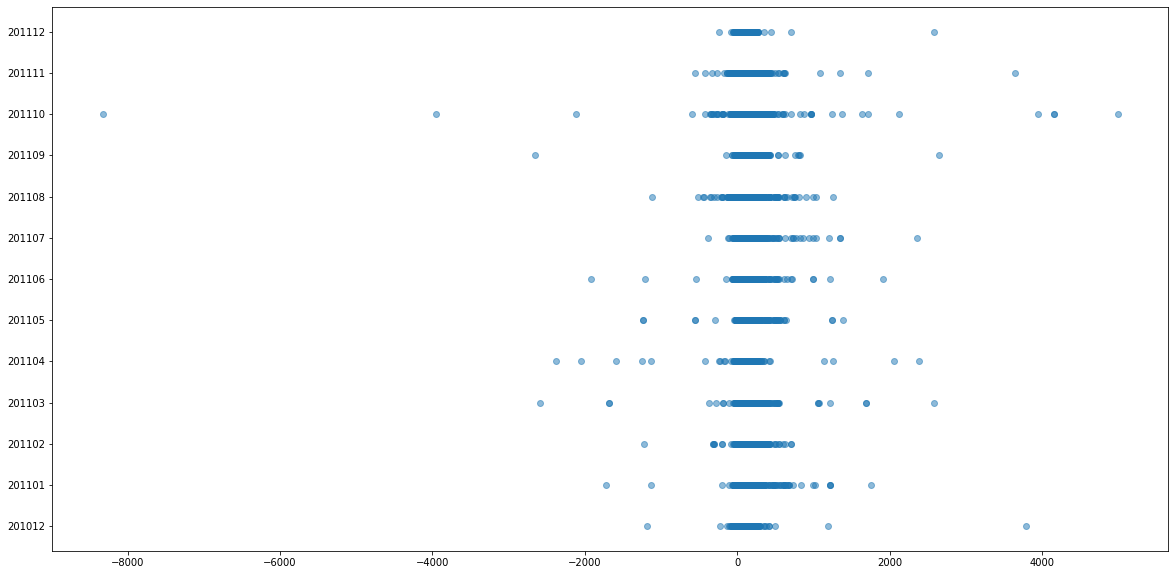

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=df.Revenue, y=df.InvoiceYearMonth, alpha=0.5)
plt.show()

## Min / Max

In [ ]:
df_min_revenue = df.groupby(['InvoiceYearMonth']).agg({'Revenue': min}).reset_index()
df_min_revenue

,InvoiceYearMonth,Revenue
0,201012,-1188.00
1,201101,-1715.85
2,201102,-1224.00
3,201103,-2583.76
4,201104,-2382.92
5,201105,-1241.98
6,201106,-1917.00
7,201107,-389.68
8,201108,-1121.18
9,201109,-2653.95


In [ ]:
df_max_revenue = df.groupby(['InvoiceYearMonth']).agg({'Revenue': max}).reset_index()
df_max_revenue

,InvoiceYearMonth,Revenue
0,201012,3794.40
1,201101,1752.00
2,201102,700.80
3,201103,2583.76
4,201104,2382.92
5,201105,1392.00
6,201106,1917.00
7,201107,2365.20
8,201108,1260.00
9,201109,2653.95


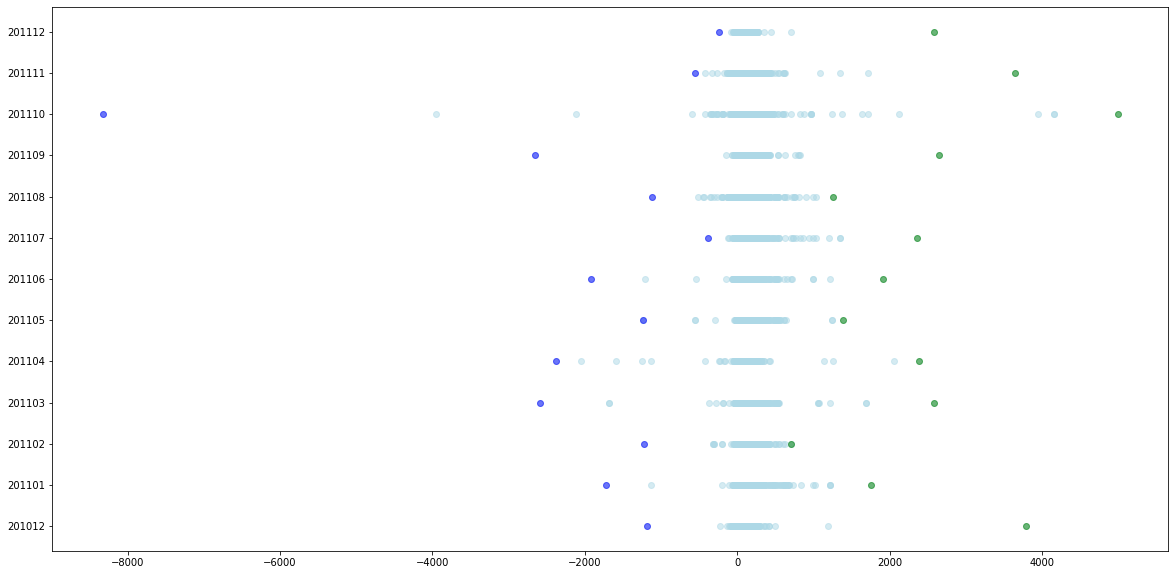

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=df.Revenue, y=df.InvoiceYearMonth, alpha=0.5, color="lightblue")
plt.scatter(x=df_min_revenue.Revenue, y=df_min_revenue.InvoiceYearMonth, alpha=0.5, color="blue")
plt.scatter(x=df_max_revenue.Revenue, y=df_max_revenue.InvoiceYearMonth, alpha=0.5, color="green")
plt.show()

## Quantis

In [ ]:
df[df.InvoiceYearMonth == "201110"]["Revenue"].count()

6221

In [ ]:
qtl = df[df.InvoiceYearMonth == "201110"]["Revenue"].quantile(.5)
qtl

16.6

In [ ]:
df[(df.InvoiceYearMonth == "201110") & (df.Revenue <= qtl)].count()

InvoiceNo           3133
StockCode           3133
Description         3133
Quantity            3133
InvoiceDate         3133
UnitPrice           3133
CustomerID          3009
Country             3133
InvoiceYearMonth    3133
Revenue             3133
dtype: int64

In [ ]:
df_qtl_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].quantile(0.5).reset_index()
df_qtl_revenue

,InvoiceYearMonth,Revenue
0,201012,17.7
1,201101,17.7
2,201102,17.7
3,201103,17.4
4,201104,17.4
5,201105,17.7
6,201106,17.7
7,201107,16.5
8,201108,17.0
9,201109,17.4


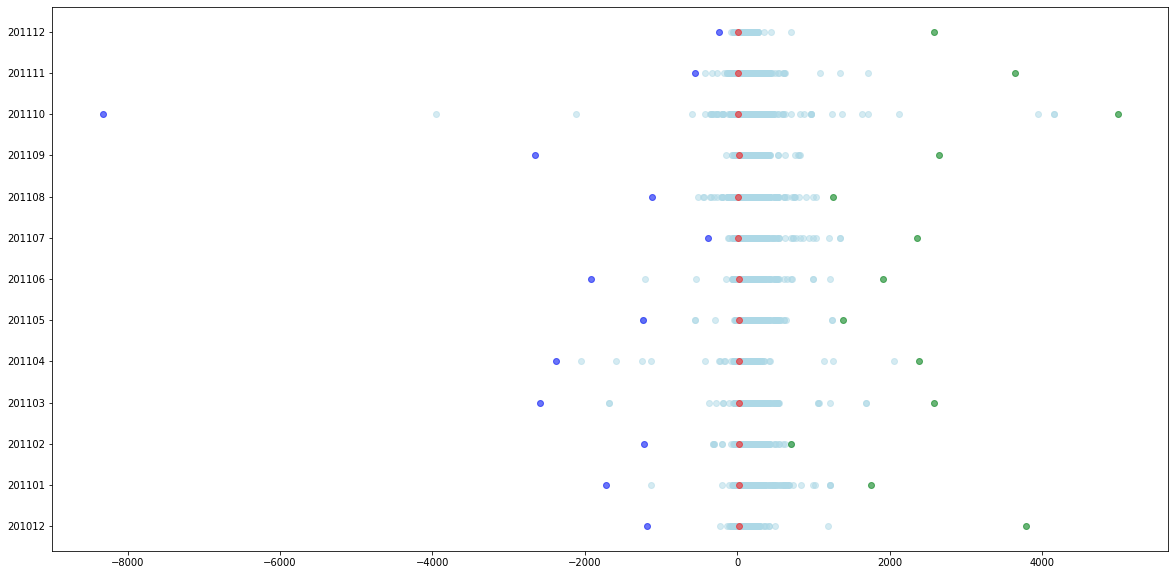

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=df.Revenue, y=df.InvoiceYearMonth, alpha=0.5, color="lightblue")
plt.scatter(x=df_min_revenue.Revenue, y=df_min_revenue.InvoiceYearMonth, alpha=0.5, color="blue")
plt.scatter(x=df_max_revenue.Revenue, y=df_max_revenue.InvoiceYearMonth, alpha=0.5, color="green")
plt.scatter(x=df_qtl_revenue.Revenue, y=df_qtl_revenue.InvoiceYearMonth, alpha=0.5, color="red")
plt.show()

## Média

In [ ]:
df_mean_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].mean().reset_index()
df_mean_revenue

,InvoiceYearMonth,Revenue
0,201012,30.651273
1,201101,38.710182
2,201102,38.398777
3,201103,37.843703
4,201104,27.131565
5,201105,37.782504
6,201106,36.921040
7,201107,32.588708
8,201108,34.598701
9,201109,33.596733


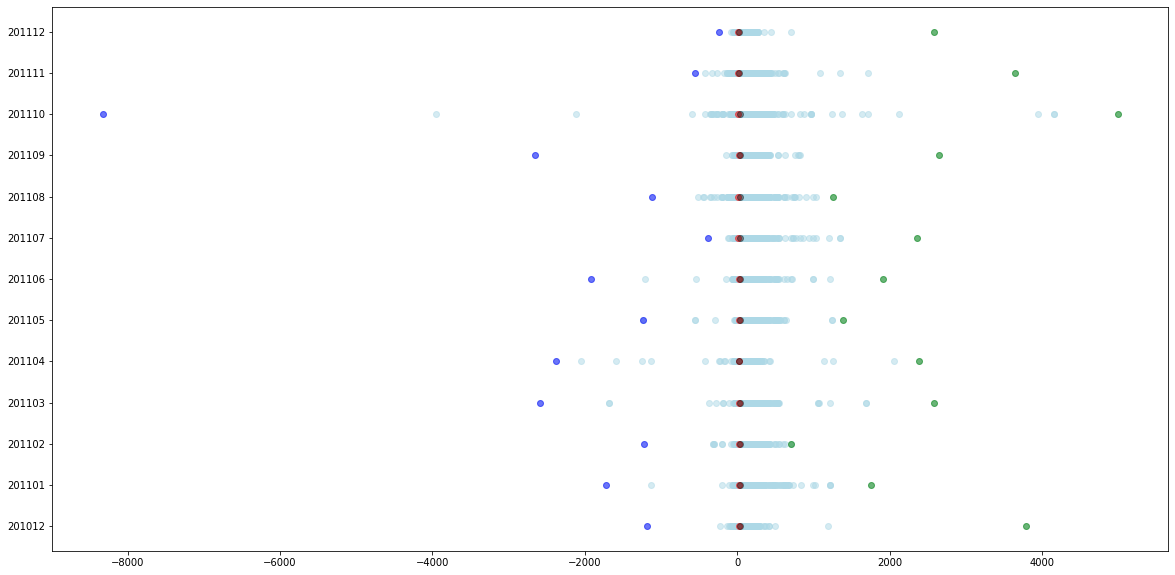

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=df.Revenue, y=df.InvoiceYearMonth, alpha=0.5, color="lightblue")
plt.scatter(x=df_min_revenue.Revenue, y=df_min_revenue.InvoiceYearMonth, alpha=0.5, color="blue")
plt.scatter(x=df_max_revenue.Revenue, y=df_max_revenue.InvoiceYearMonth, alpha=0.5, color="green")
plt.scatter(x=df_qtl_revenue.Revenue, y=df_qtl_revenue.InvoiceYearMonth, alpha=0.5, color="red")
plt.scatter(x=df_mean_revenue.Revenue, y=df_mean_revenue.InvoiceYearMonth, alpha=0.4, color="black")
plt.show()

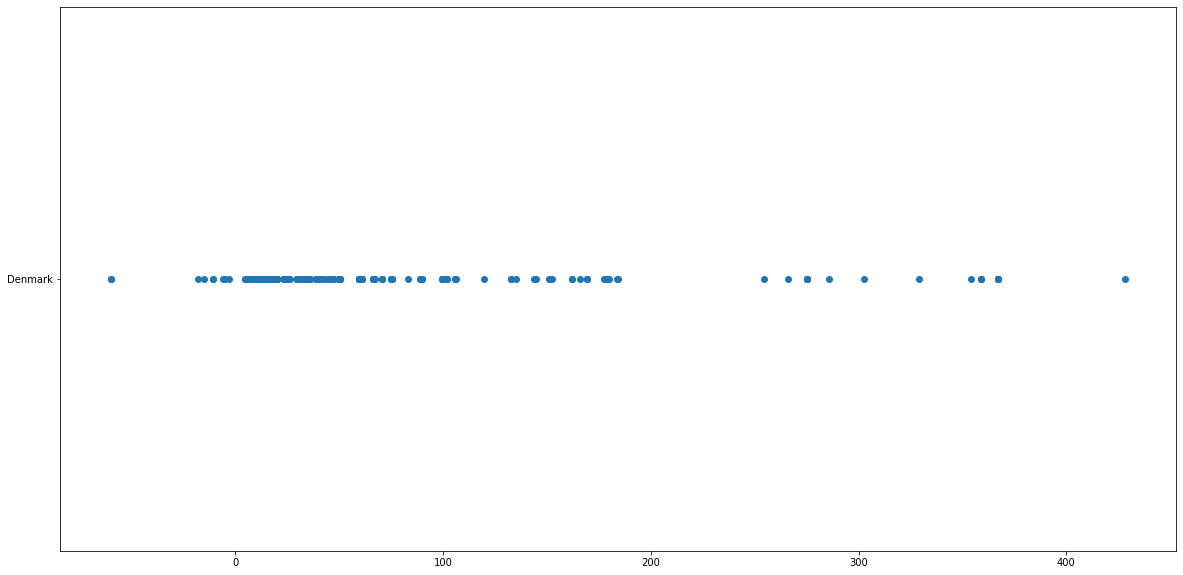

In [ ]:
df = df[df.Country=='Denmark']

plt.figure(figsize=(20,10))
plt.scatter(x=df.Revenue, y=df.Country)
plt.show()

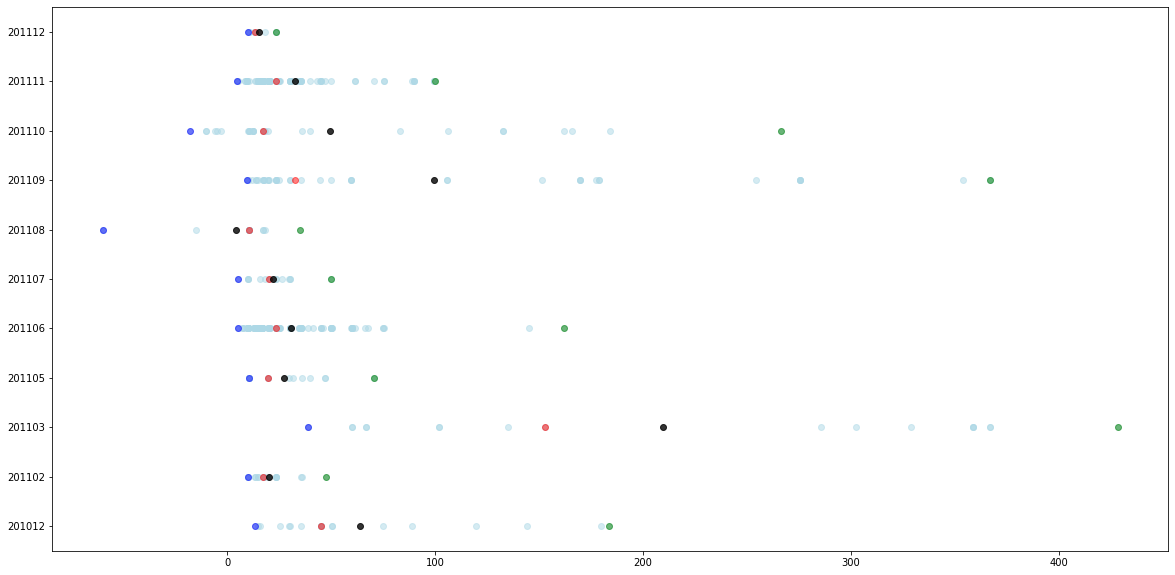

In [ ]:
df_min_revenue = df.groupby(['InvoiceYearMonth']).agg({'Revenue': min}).reset_index()
df_max_revenue = df.groupby(['InvoiceYearMonth']).agg({'Revenue': max}).reset_index()
df_qtl_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].quantile(0.5).reset_index()
df_mean_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].mean().reset_index()

plt.figure(figsize=(20,10))
plt.scatter(x=df.Revenue, y=df.InvoiceYearMonth, alpha=0.5, color="lightblue")
plt.scatter(x=df_min_revenue.Revenue, y=df_min_revenue.InvoiceYearMonth, alpha=0.5, color="blue")
plt.scatter(x=df_max_revenue.Revenue, y=df_max_revenue.InvoiceYearMonth, alpha=0.5, color="green")
plt.scatter(x=df_qtl_revenue.Revenue, y=df_qtl_revenue.InvoiceYearMonth, alpha=0.5, color="red")
plt.scatter(x=df_mean_revenue.Revenue, y=df_mean_revenue.InvoiceYearMonth, alpha=0.8, color="black")
plt.show()


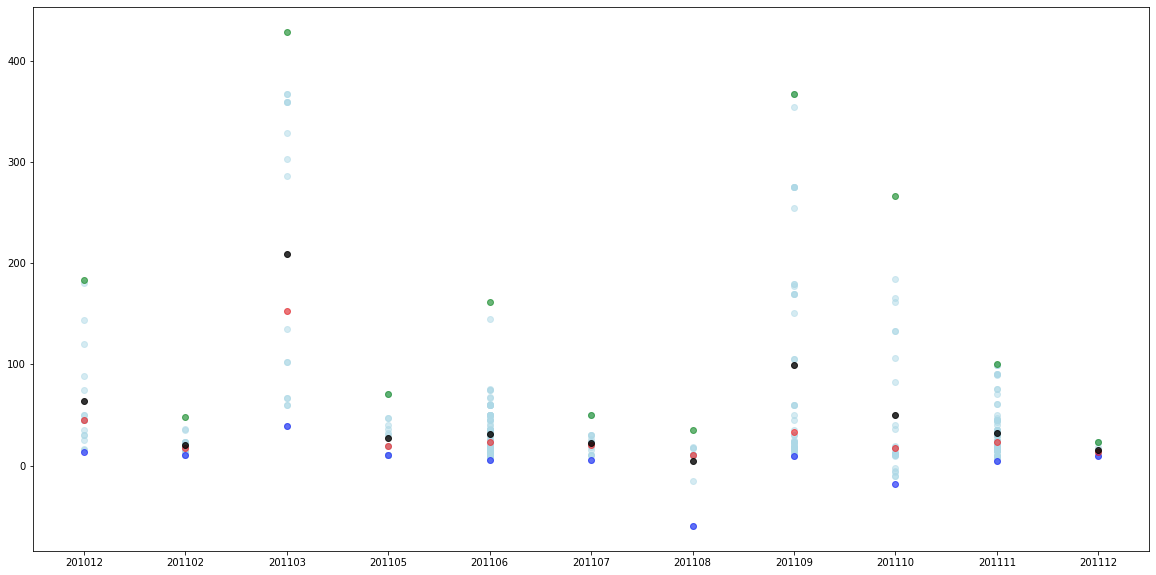

In [ ]:

plt.figure(figsize=(20,10))
plt.scatter(y=df.Revenue, x=df.InvoiceYearMonth, alpha=0.5, color="lightblue")
plt.scatter(y=df_min_revenue.Revenue, x=df_min_revenue.InvoiceYearMonth, alpha=0.5, color="blue")
plt.scatter(y=df_max_revenue.Revenue, x=df_max_revenue.InvoiceYearMonth, alpha=0.5, color="green")
plt.scatter(y=df_qtl_revenue.Revenue, x=df_qtl_revenue.InvoiceYearMonth, alpha=0.5, color="red")
plt.scatter(y=df_mean_revenue.Revenue, x=df_mean_revenue.InvoiceYearMonth, alpha=0.8, color="black")
plt.show()

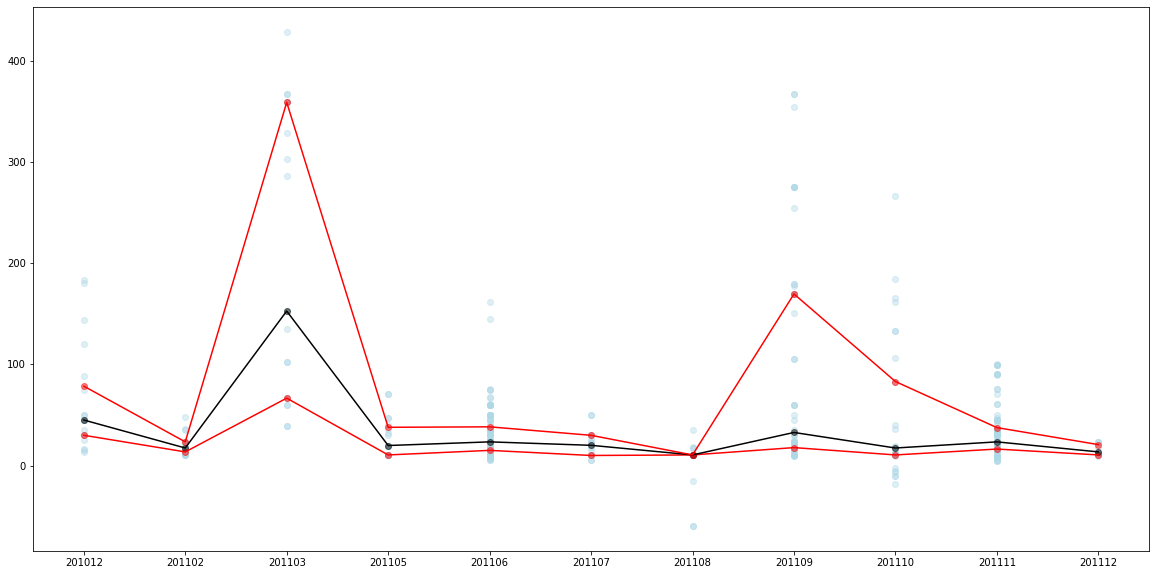

In [ ]:
df_q1_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].quantile(0.25).reset_index()
df_q2_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].quantile(0.5).reset_index()
df_q3_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].quantile(0.75).reset_index()

plt.figure(figsize=(20,10))
plt.scatter(y=df.Revenue, x=df.InvoiceYearMonth, alpha=0.4, color="lightblue")
plt.scatter(y=df_q1_revenue.Revenue, x=df_q1_revenue.InvoiceYearMonth, alpha=0.5, color="red")
plt.scatter(y=df_q2_revenue.Revenue, x=df_q2_revenue.InvoiceYearMonth, alpha=0.5, color="black")
plt.scatter(y=df_q3_revenue.Revenue, x=df_q3_revenue.InvoiceYearMonth, alpha=0.5, color="red")

plt.plot(df_q1_revenue.InvoiceYearMonth, df_q1_revenue.Revenue, color="red")
plt.plot(df_q2_revenue.InvoiceYearMonth, df_q2_revenue.Revenue, color="black")
plt.plot(df_q3_revenue.InvoiceYearMonth, df_q3_revenue.Revenue, color="red")

plt.show()

In [ ]:
df_q1_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].quantile(0.25).reset_index()
df_q3_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].quantile(0.75).reset_index()

s_diff = df_q3_revenue.Revenue - df_q1_revenue.Revenue
df_temp = pd.DataFrame({'InvoiceYearMonth':df_q3_revenue.InvoiceYearMonth, 'q3':df_q3_revenue.Revenue, 'q1':df_q1_revenue.Revenue, 'q3_q1_diff': s_diff})

df_temp

,InvoiceYearMonth,q3,q1,q3_q1_diff
0,201012,78.45,29.9250,48.5250
1,201102,23.40,13.5000,9.9000
2,201103,358.80,66.6000,292.2000
3,201105,37.80,10.5000,27.3000
4,201106,38.25,15.0000,23.2500
5,201107,29.88,9.9600,19.9200
6,201108,10.50,10.5000,0.0000
7,201109,169.50,17.7375,151.7625
8,201110,83.00,10.5000,72.5000
9,201111,37.50,16.3000,21.2000


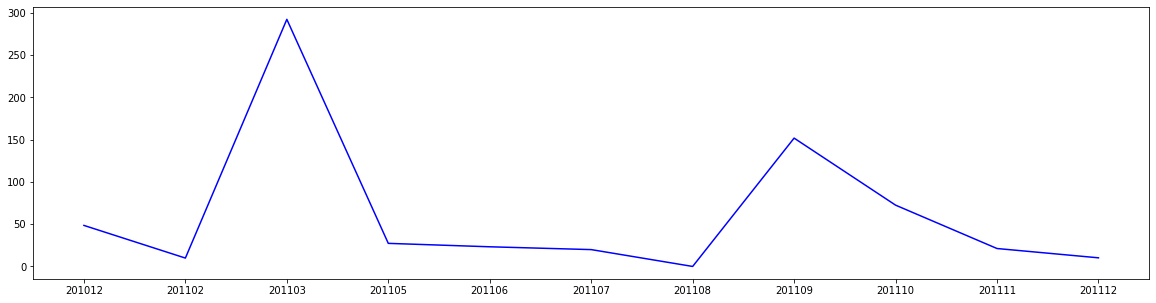

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(df_temp.InvoiceYearMonth, df_temp.q3_q1_diff, color="blue")

plt.show()

In [ ]:
s = df[df.InvoiceYearMonth=="201106"].Revenue
s = s.reset_index().drop(columns=["index"])
s

,Revenue
0,35.40
1,35.40
2,35.40
3,35.40
4,20.28
...,...
101,35.40
102,10.08
103,13.92
104,9.36


In [ ]:
s

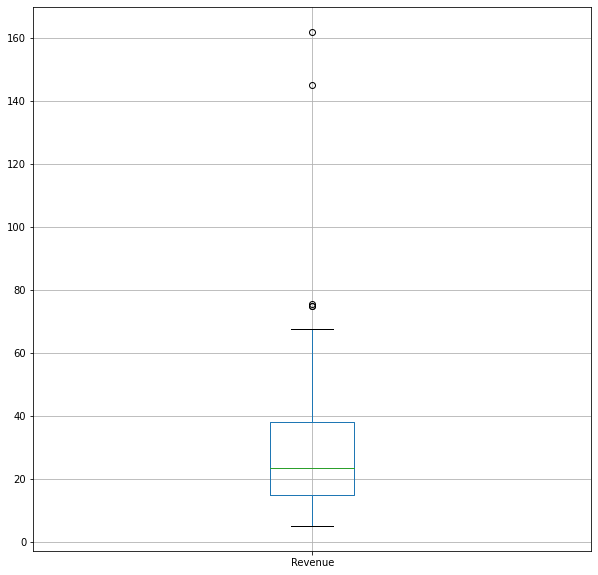

In [ ]:
s.boxplot(figsize=(10,10))

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
20017,538003,22847,BREAD BIN DINER STYLE IVORY,8,2010-12-09 12:05:00,14.95,12429.0,Denmark,201012,119.6
20018,538003,22779,WOODEN OWLS LIGHT GARLAND,48,2010-12-09 12:05:00,3.75,12429.0,Denmark,201012,180.0
20019,538003,22331,WOODLAND PARTY BAG + STICKER SET,8,2010-12-09 12:05:00,1.65,12429.0,Denmark,201012,13.2
20020,538003,22365,DOORMAT RESPECTABLE HOUSE,2,2010-12-09 12:05:00,7.95,12429.0,Denmark,201012,15.9
20021,538003,22673,FRENCH GARDEN SIGN BLUE METAL,24,2010-12-09 12:05:00,1.25,12429.0,Denmark,201012,30.0
...,...,...,...,...,...,...,...,...,...,...
527390,580716,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-05 16:48:00,1.95,12367.0,Denmark,201112,23.4
527391,580716,22630,DOLLY GIRL LUNCH BOX,12,2011-12-05 16:48:00,1.95,12367.0,Denmark,201112,23.4
527392,580716,22708,WRAP DOLLY GIRL,25,2011-12-05 16:48:00,0.42,12367.0,Denmark,201112,10.5
527393,580716,22045,SPACEBOY GIFT WRAP,25,2011-12-05 16:48:00,0.42,12367.0,Denmark,201112,10.5


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


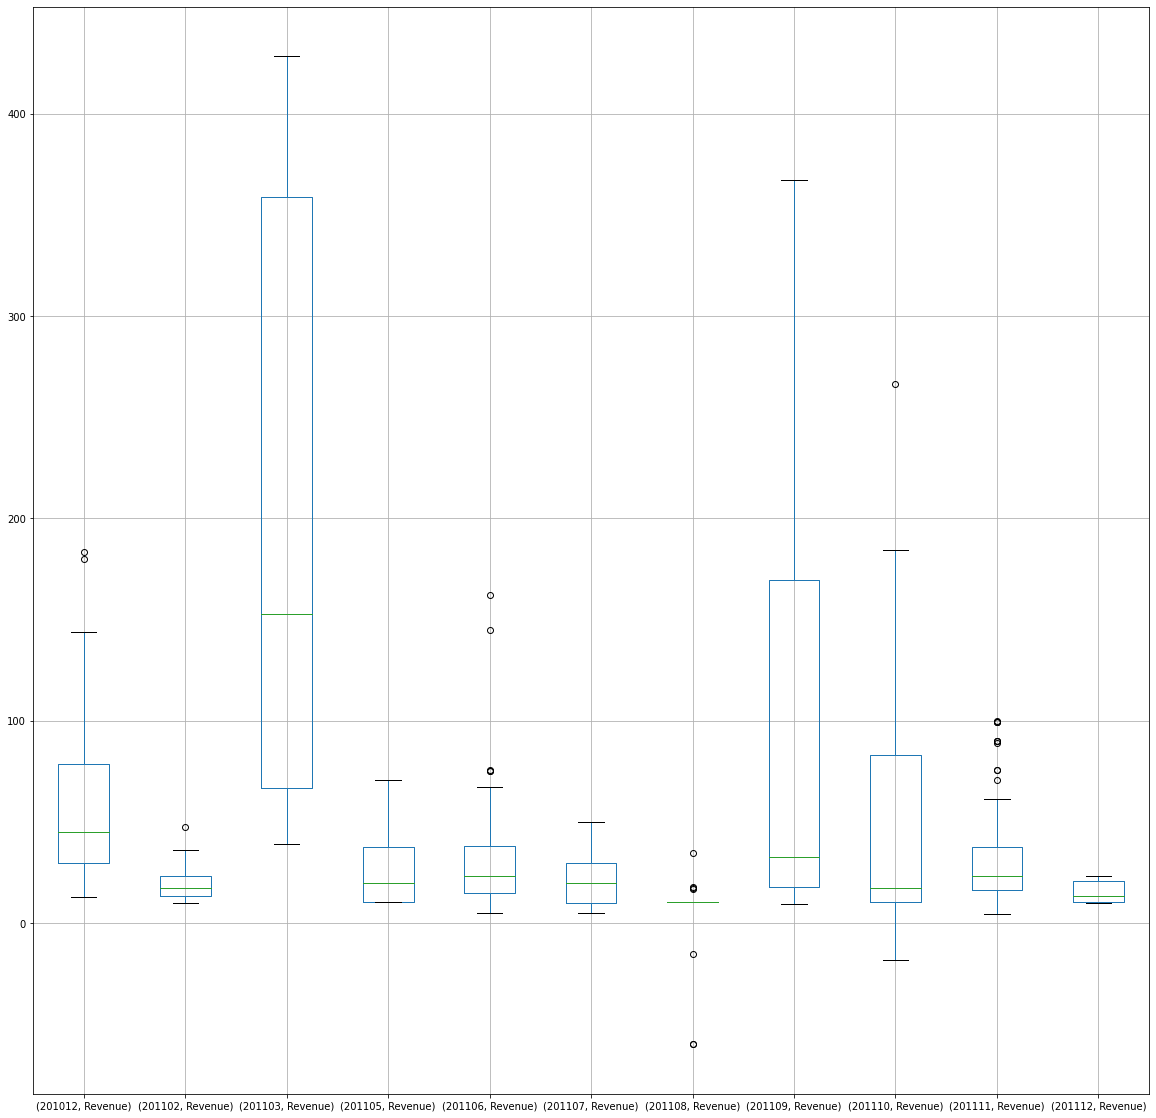

In [ ]:
df_temp = df[['InvoiceYearMonth', 'Revenue']]
grouped = df_temp.groupby(['InvoiceYearMonth'])
grouped.boxplot(figsize=(20,20), subplots=False)

## BoxPlot e ViolinPlot com Seaborn

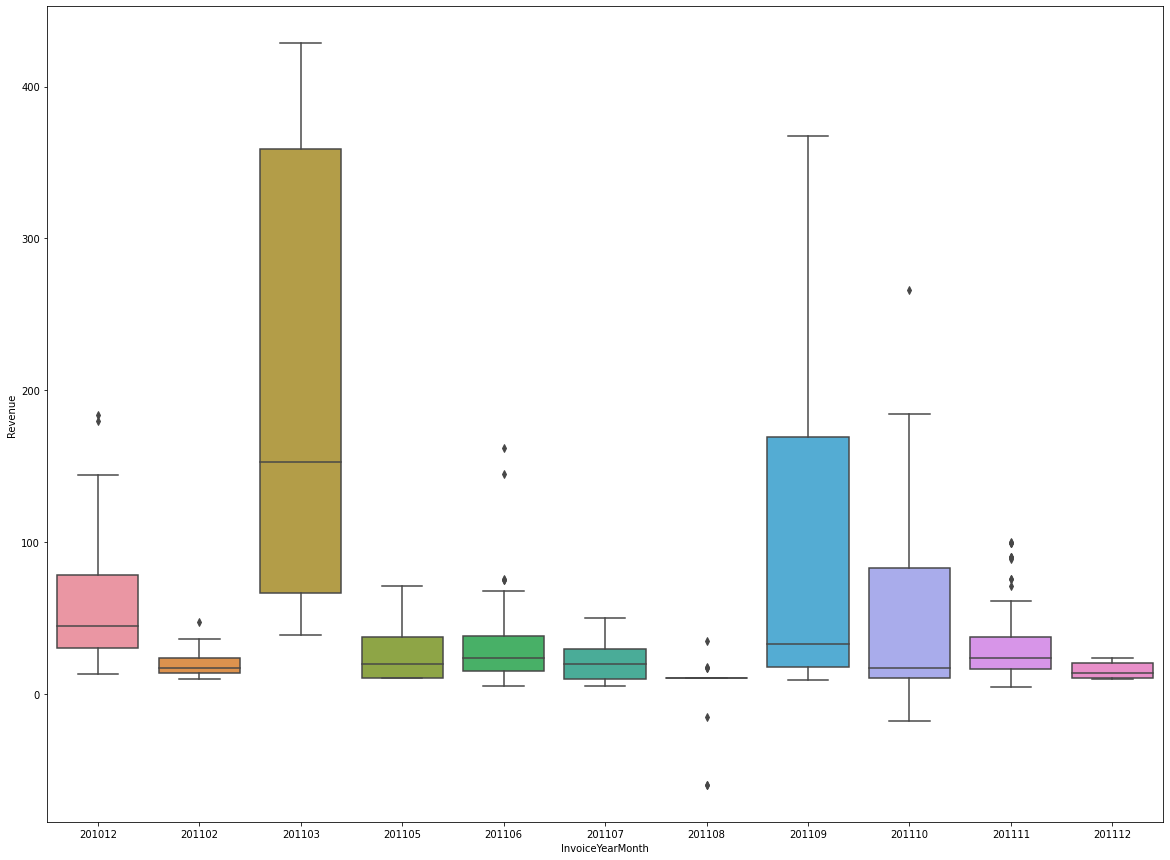

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(x='InvoiceYearMonth', y='Revenue', data=df_temp)

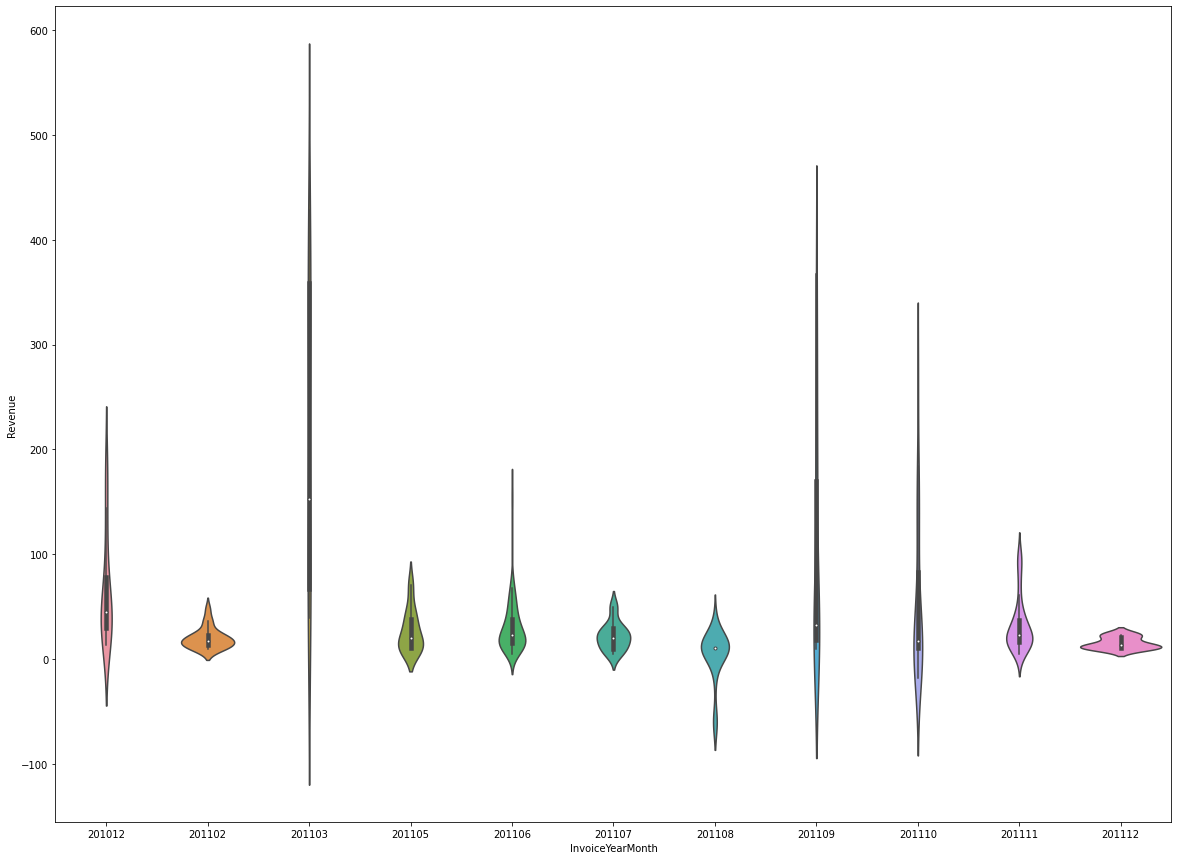

In [ ]:
plt.figure(figsize=(20,15))
sns.violinplot(x='InvoiceYearMonth', y='Revenue', data=df_temp)